In [20]:
X = list(range(10))
Y=[1,1,2,4,5,7,8,9,9,10]
print(len(Y))
print(len(X))

10
10


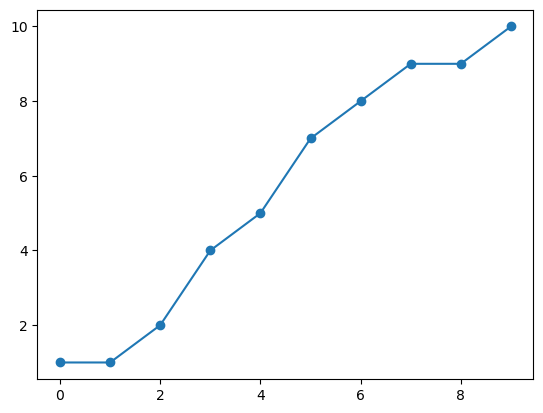

In [21]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.scatter(X, Y)

In [34]:
def h(x, w):
    return w*x
class H():
    def __init__(self, w):
        self.w = w

    def forward(self, x):
        return self.w * x

def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error+=(h.forward(X[i])-Y[i])** 2
    error = error / len(X)
    return(error)


h = H(4)
cost(h,X,Y)


222.2

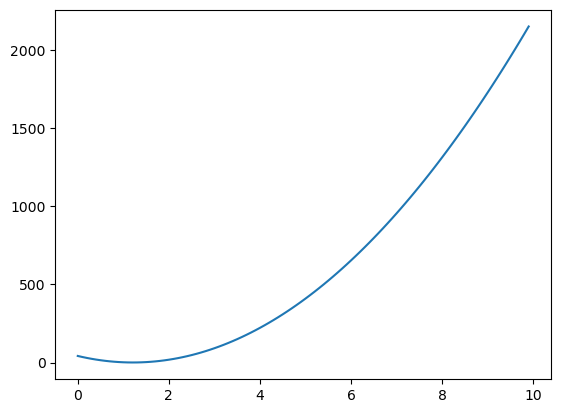

In [36]:
list_w = []
list_c = []
for i in range(100):
    w = i * 0.1
    h=H(w)
    c=cost(h,X,Y)
    list_w.append(w)
    list_c.append(c)

plt.plot(list_w, list_c)

3.984137878870025 1.4654142499999985 1.292 1.459999999999999
3.984137878870025 0.6270309024125553 1.24556 0.6260240000000001
3.984137878870025 0.472013821443593 1.2255908 0.47182183759999974
3.984137878870025 0.44335116317242307 1.217004044 0.44330985777223975
3.984137878870025 0.4380514376580821 1.21331173892 0.43803799270208704
3.984137878870025 0.43707151841047975 1.2117240477356 0.43706322485061583
3.984137878870025 0.4368903313415976 1.211041340526308 0.4368829902748789
3.984137878870025 0.4368568298525614 1.2107477764263124 0.4368496649018249
3.984137878870025 0.43685063542723845 1.2106215438633143 0.4368435030403477
3.984137878870025 0.43684949007799656 1.2105672638612253 0.43684236371216045
3.984137878870025 0.4368492783029217 1.2105439234603268 0.43684215305037843
3.984137878870025 0.43684923914571006 1.2105338870879405 0.4368421140990149
3.984137878870025 0.4368492319055418 1.2105295714478144 0.436842106896908
3.984137878870025 0.43684923056683467 1.2105277157225602 0.4368421

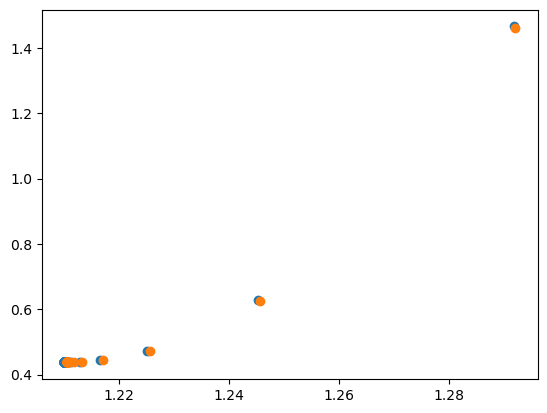

In [66]:
def gradient(w, cost):
    # cost2 - cost1 / epsilon
    h = H(w)
    cost1 = cost(h,X,Y)
    epsilon=0.001
    h = H(w+epsilon)
    cost2 = cost(h, X, Y)
    d_cost = cost2 - cost1
    d_w = epsilon
    grad = d_cost / d_w
    return grad, (cost1+cost2)/2

def gradient_2(w, cost):
    h=H(w)
    grad = 0

    for i in range(len(X)):
        # 편미분 편의를 위해 1/2m 해줬기 떄문에 다시 2를 곱해줘야함 ㅇㅅㅇ~ 
        grad += (h.forward(X[i]) - Y[i]) * X[i] * 2
    grad = grad/len(X)
    c = cost(h,X,Y)
    return grad, c

w1=1.4
w2=1.4
lr = 0.01
list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []
for i in range(100):
    #w = w + lr * (-gradient(w, cost))
    grad, mean_cost = gradient(w1, cost)
    grad_2, mean_cost_2 = gradient_2(w2, cost)
    w1 -= lr * grad
    w2 -= lr * grad_2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost_2)
    print(w, mean_cost, w2, mean_cost_2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)
